#### Insert Libraries

In [34]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter 

#### Merge 12 files of data into one file

In [3]:
sale_files = [file for file in os.listdir('./Sales_Data')]

all_data = pd.DataFrame() 

for file in sale_files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_data = pd.concat([all_data, df])

#### Cleaning the Data

In [4]:
# Drop NAN Rows From Table 
all_data = all_data.dropna(how = "all")

# Drop 'OR' From Table
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Add Month # Column to Table 

In [5]:
#This makes it easier to filter out Months

all_data['Month #'] = all_data['Order Date'].str[0:2]
all_data['Month #'] = all_data['Month #'].astype('int32')

#### Add Sales Column to Table 

In [6]:
#Get Sales Column from Quanity Ordered * Price Each Columns 
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# The Month with the Best Month for Sales 

#### Group Month Sales Together and Show in Table

In [7]:
month_total_sales = all_data.groupby('Month #')[['Quantity Ordered', 'Sales']].sum()
display(month_total_sales)

,Quantity Ordered,Sales
Month #,,
1,10903,1822256.73
2,13449,2202022.42
3,17005,2807100.38
4,20558,3390670.24
5,18667,3152606.75
6,15253,2577802.26
7,16072,2647775.76
8,13448,2244467.88
9,13109,2097560.13


#### Display Table on Graph

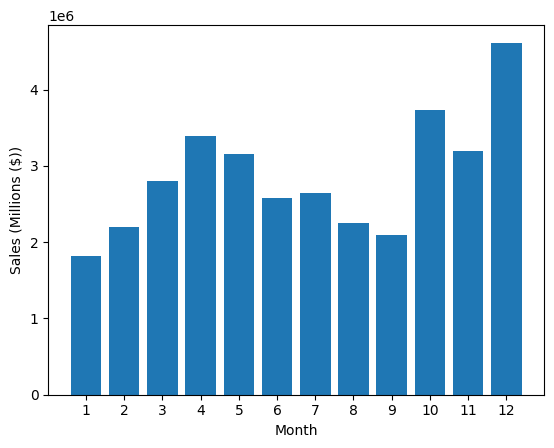

In [8]:
months = range(1,13)

plt.xlabel('Month')
plt.ylabel('Sales (Millions ($))')
plt.bar(months, month_total_sales['Sales'])
plt.xticks(months)
plt.show()

# The City with the Highest Number of Sales

#### Add City Column 

In [9]:
#get_city function grabs the address from the table and returns the city
#Cities are split by commas 

def get_city(address):
    return address.split(',')[1]

#get_state function grabs the state of the city from the address - Needed due to duplicate cities with different states 
#States are split by spaces 

def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month #,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### Group City Sales Together 

In [10]:
city_total_sales = all_data.groupby(all_data['City'])[['Quantity Ordered', 'Sales']].sum()
display(city_total_sales)

,Quantity Ordered,Sales
City,,
Atlanta GA,16602,2795498.58
Austin TX,11153,1819581.75
Boston MA,22528,3661642.01
Dallas TX,16730,2767975.40
Los Angeles CA,33289,5452570.80
New York City NY,27932,4664317.43
Portland ME,2750,449758.27
Portland OR,11303,1870732.34
San Francisco CA,50239,8262203.91


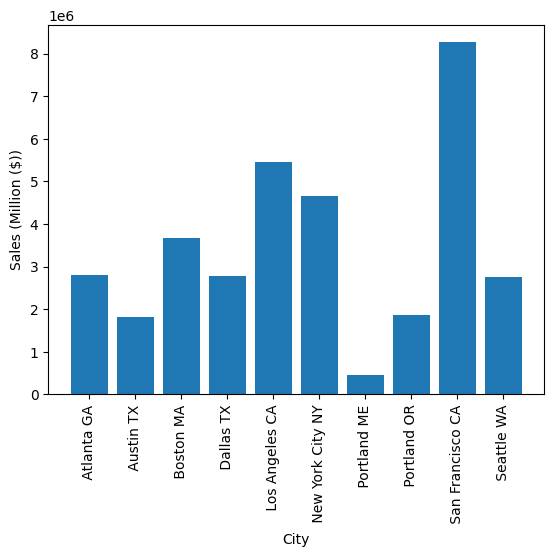

In [11]:
#So the cities follow the same order from above
cities = [city for city , df in all_data.groupby('City')]


plt.xlabel('City')
plt.ylabel('Sales (Million ($))')
plt.bar(cities, city_total_sales['Sales'])
plt.xticks(cities, rotation = 'vertical')
plt.show()

# Best Time to Market Product

In [16]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour #'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month #,Sales,City,Hour #
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [19]:
hours = [hour for hour, df in all_data.groupby('Hour #')]

#### Graph sales data for each hour 

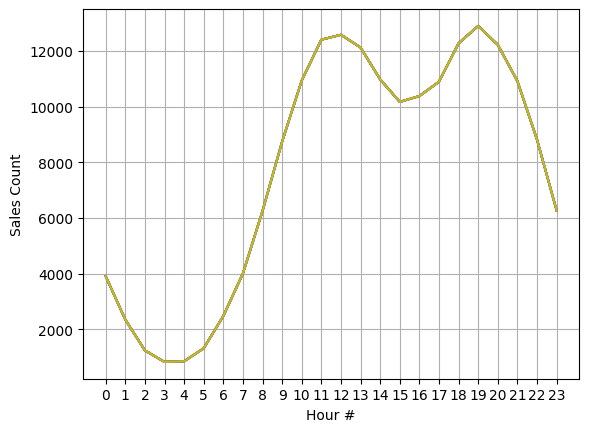

In [24]:
plt.xlabel("Hour #")
plt.xticks(hours)
plt.ylabel("Sales Count")
plt.grid()
plt.plot(hours, all_data.groupby("Hour #").count())

# Pair of Products Most Often Sold Together

In [26]:
duplicated_df = all_data[all_data['Order ID'].duplicated(keep=False)]

#### Group Products From Duplicate ID Together in New Column

In [35]:
duplicated_df['Product Grouped'] = duplicated_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicated_df.head()

C:\Users\docto\AppData\Local\Temp\ipykernel_28952\2172017654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df['Product Grouped'] = duplicated_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month #,Sales,City,Hour #,Product Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


#### Drop duplicates from Dataframe

In [36]:
duplicated_df[['Order ID', 'Product Grouped']].drop_duplicates()

,Order ID,Product Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [42]:
#Using Counter and combinations Libraries 
count = Counter()

for row in duplicated_df['Product Grouped']: 
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 2140),
 (('Google Phone', 'USB-C Charging Cable'), 2116),
 (('iPhone', 'Wired Headphones'), 987),
 (('Google Phone', 'Wired Headphones'), 949),
 (('iPhone', 'Apple Airpods Headphones'), 799),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 773),
 (('Google Phone', 'Bose SoundSport Headphones'), 503),
 (('USB-C Charging Cable', 'Wired Headphones'), 452),
 (('Vareebadd Phone', 'Wired Headphones'), 327),
 (('Lightning Charging Cable', 'Wired Headphones'), 253)]

# The Product That Was Sold The Most 

#### Group Products 

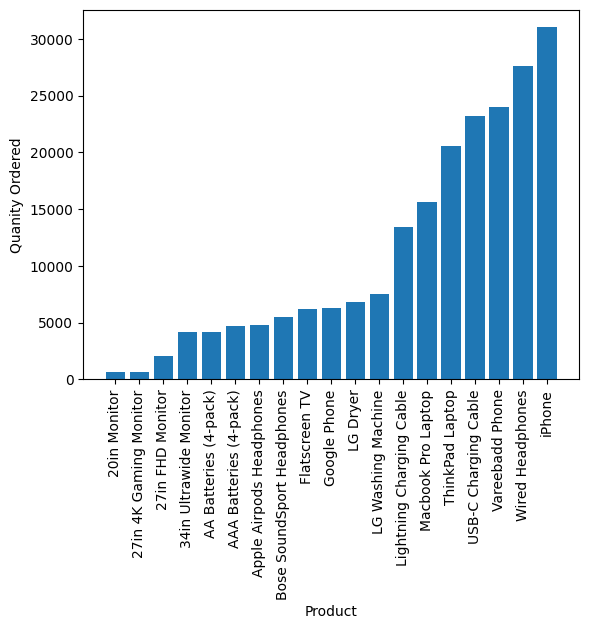

In [108]:
products = [product for product , df in all_data.groupby('Product')]
products_count = all_data.groupby(all_data['Product'])[['Quantity Ordered']].sum()

plt.xlabel('Product')
plt.ylabel('Quanity Ordered')
plt.bar(products, sorted(products_count['Quantity Ordered']))
plt.xticks(products, rotation = 'vertical')
plt.show()